# Прогноз вероятности оттока клиентов фитнес-центра

***Заказчик исследования:*** маркетинговый отдел фитнес-центра.  

***Цель исследования:*** определение признаков посетителей, склонных к прекращению посещения фитнесс-центра, и прогноз по оттоку клиентов.  

***Описание данных*** 

Исходные данные:  
1. Данные клиента за предыдущий до проверки факта оттока месяц.
2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента.

Таблица с исходными данными содержится в файле gym_churn.csv.
В таблице представлены следующие данные: 

- gender — пол;
- Near_Location — проживание или работа в районе, где находится фитнес-центр;
- Partner — сотрудник компании-партнёра клуба;
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга»;
- Phone — наличие контактного телефона;
- Age — возраст;
- Lifetime — время с момента первого обращения в фитнес-центр (в месяцах);
- Contract_period — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах);
- Group_visits — факт посещения групповых занятий;
- Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
- Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
- Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра;
- Churn — факт оттока в текущем месяце.

***Содержание исследования:***  
1. [Общая информация о датафрейме](#dataframe_info)  
            
2. [Исследовательский анализ данных (EDA)](#eda)  
 2.1. [Предобработка данных](#pred)  
 2.1. [Диаграммы и корреляция](#diagr)  

3. [Модель прогнозирования оттока клиентов](#forecast)  
 
4. [Кластеризация клиентов](#clusters)  

5. [Общий вывод](#final)  

## Общая информация о датафрейме
<a id="dataframe_info"></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from itertools import combinations

На основе файла с исходными данными создаем датафрейм:

In [2]:
df_start = pd.read_csv('/datasets/gym_churn.csv')

Функция вывода общей информации о датафрейме:

In [3]:
def information(df):
    print('Размер датафрейма:')
    print(df_start.shape)
    print('____________________________________________________________')
    print()
    print('Общая информация о датафрейме:')
    print(df_start.info(memory_usage='deep'))
    print('____________________________________________________________')
    print()
    print('Несколько строк датафрейма:')
    display(df_start.sample(random_state=0, n=5))
    print('____________________________________________________________')
    print()
    print('Основные статистические данные:')
    display(df_start.describe().T)

Выводим общую информацию о датафрейме:

In [4]:
information(df_start)

Размер датафрейма:
(4000, 14)
____________________________________________________________

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 1

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2230,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
668,0,0,0,0,1,1,1,27,48.087954,1.0,0,1.003281,0.728397,1
3616,0,0,1,0,1,6,0,30,24.620589,5.0,2,0.000000,0.000000,0
2363,1,1,0,0,1,1,1,27,139.893107,1.0,0,2.322132,1.838436,1
142,1,0,1,0,0,12,0,29,89.657794,12.0,1,3.521502,3.368137,0


____________________________________________________________

Основные статистические данные:


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


***Вывод:***
1. В таблице 4000 строк и 14 полей.
2. Пропуски отсутствуют. Данные представлены только в виде целых (int) и вещественных чисел (float).
3. Данные полей "gender", "Near_Location", "Partner", "Promo_friends", "Phone", "Group_visits", "Churn" принимают 2 значения - 0 и 1 (False и True). В целях экономии ресурсов целесообразно заменить их тип на "uint8"
4. Максимальные значения "Avg_additional_charges_total", "Lifetime", "Avg_class_frequency_total" и "Avg_class_frequency_current_month" значительно превосходят средние (на 320-830%) - требуется проверка на выбросы.
5. Мужчин и женщин среди посетителей примерно поровну. Около половины (49%) являются сотрудниками компаний-партнеров. По акции "приведи друга" пришел 31%, при этом групповые занятия посещают 41%. То есть большинство посетителей пришли самостоятельно и для индивидуальных занятий. Многие - 85% - проживают в районе, в котором расположен фитнес-центр.
6. Средний возраст посетителя - 29 лет, среднее количество посещений в неделю - 1.88, средняя суммарная выручка с клиента, без учета стоимости непосредственно занятий, - 147 в месяц.

## Исследовательский анализ данных (EDA)
<a id="eda"></a>

### Предобработка данных
<a id="pred"></a>

Приводим символы названий полей к единому регистру - нижнему:

In [5]:
df_start.columns = map(str.lower, df_start.columns)

Изменяем тип полей "gender", "near_location", "partner", "promo_friends", "phone", "contract_period", "group_visits", "age", "lifetime", "churn" на "uint8":

In [6]:
df_start = df_start.astype({'gender' : 'uint8', 'near_location' : 'uint8', 'partner' : 'uint8', 'promo_friends' : 'uint8',
                            'phone' : 'uint8', 'contract_period' : 'uint8', 'group_visits' : 'uint8', 'age' : 'uint8',
                            'lifetime' : 'uint8', 'churn' : 'uint8'})

Проверяем на выбросы. Если значения не попадают в диапазон от Q1-3IQR до Q3+3IQR - удаляем соответствующие строки:

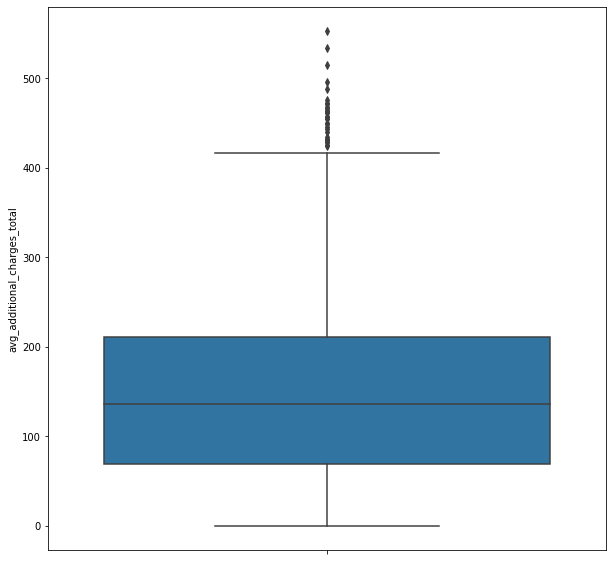

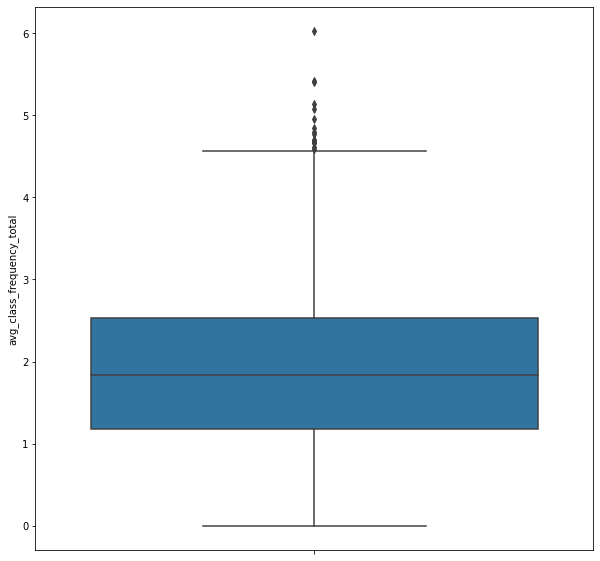

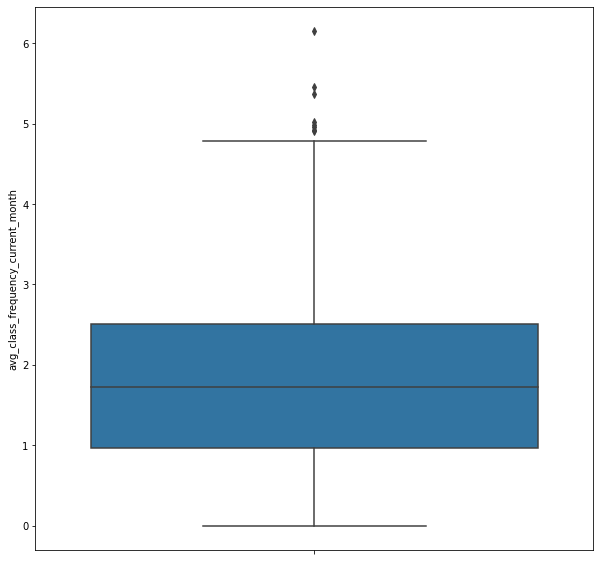

Всего удалено строк: 0


In [7]:
fields = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
for i in fields:                                              # проходим по списку параметров
    fig = plt.figure(figsize=(10,10))
    sns.boxplot(data = df_start, y=i)
    plt.show()
    
    del_quantity = len(df_start.index)                             # число строк в таблице
    q25 = df_start[i].quantile(0.25)                               # вычисляем 1-ую квантиль
    q75 = df_start[i].quantile(0.75)                               # вычисляем 3-ую квантиль                               
    minimum = q25 - 3 * (q75 - q25)                               # нижняя граница
    maximum = q75 + 3 * (q75 - q25)                               # верхняя граница
    df = df_start.loc[(df_start[i] >= minimum) & (df_start[i] <= maximum)].reset_index(drop=True)
print('Всего удалено строк: {}'.format(df_start.shape[0] - df.shape[0]))

Находим средние значения параметров для групп ушедших и оставшихся пользователей:

In [8]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Клиенты, за последний месяц ни разу не посещавший спортзал, в среднем:
- реже живут в районе фитнес-центра;
- реже являются сотрудниками компаний-партнеров;
- реже приходят по акции "приведи друга";
- оформляют абонемент на меньший период - в среднем 1.7 месяца против 5.7 у клиентов, посещавших спортзал за последний месяц;
- реже посещают групповые занятия;
- на три года моложе клиентов, посещавших спортзал за последний месяц;
- меньше тратят на дополнительные услуги;
- посещают спортзал не дольше месяца, что в 4.7 раза меньше, нежели длительность посещения "надежными" клиентами;
- реже посещают фитнес-центр.

### Диаграммы и корреляция
<a id="diagr"></a>

Строим столбчатые гистограммы и распределения параметров для клиентов, посещавших и не посещавших  фитнес-центр в последний месяц:

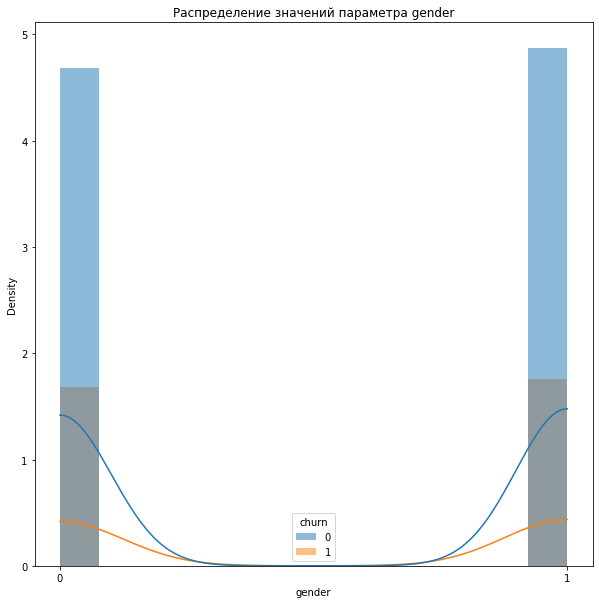

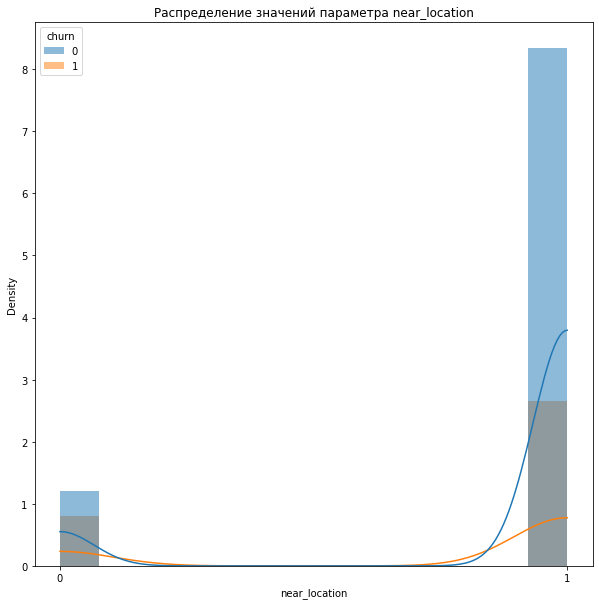

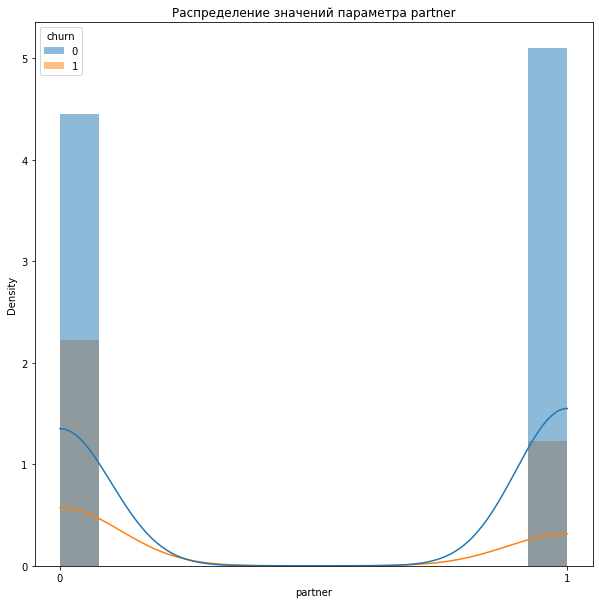

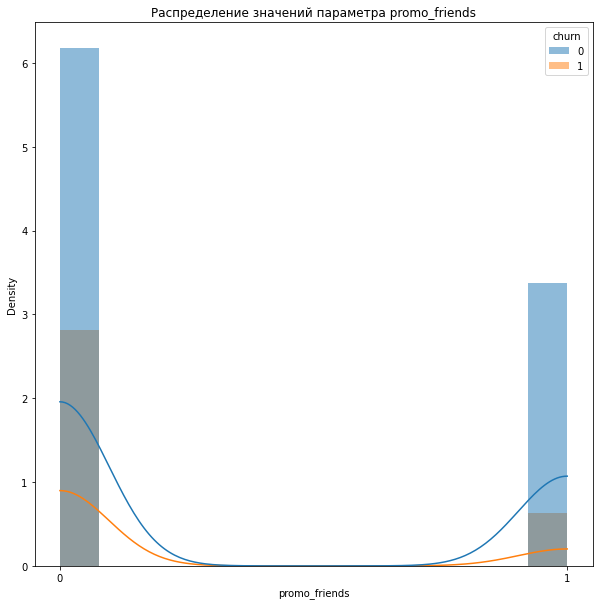

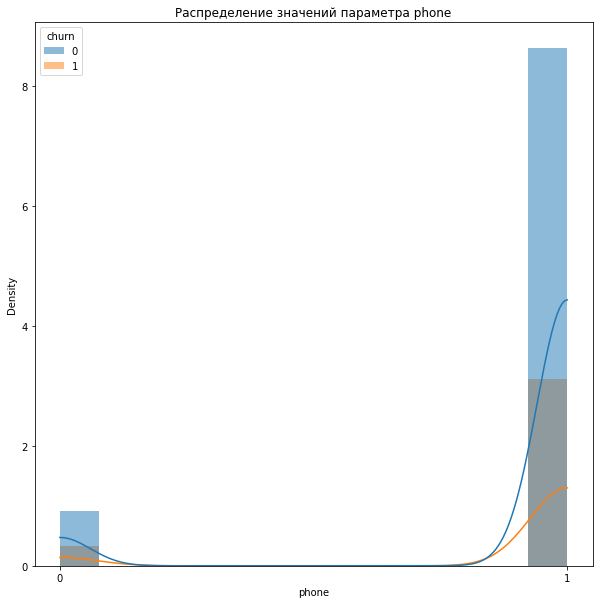

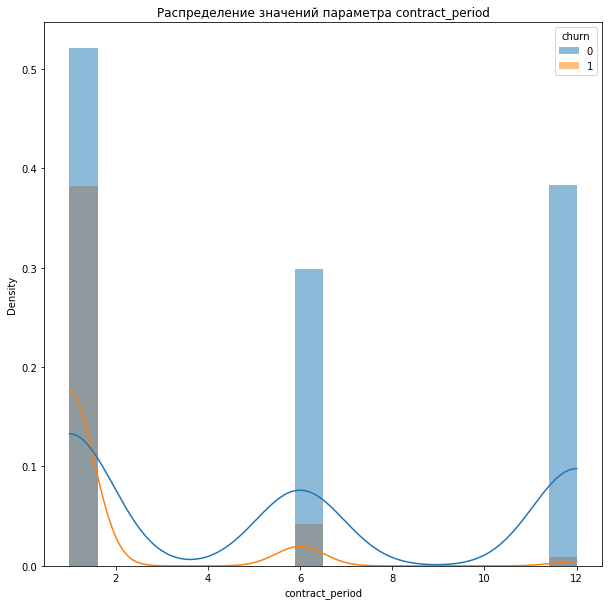

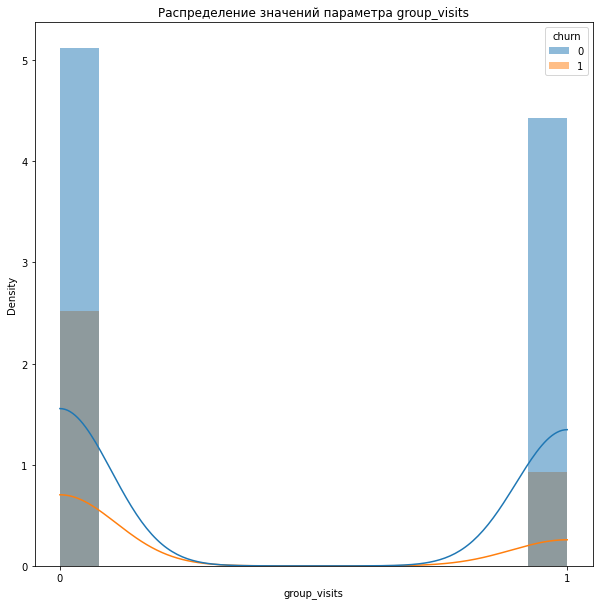

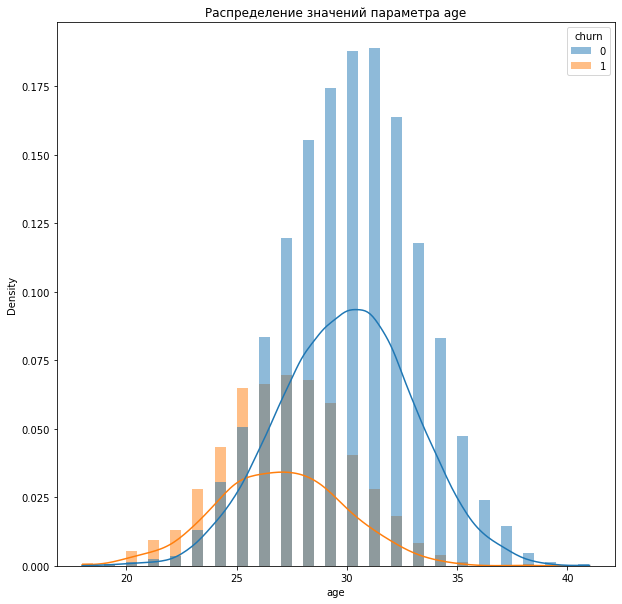

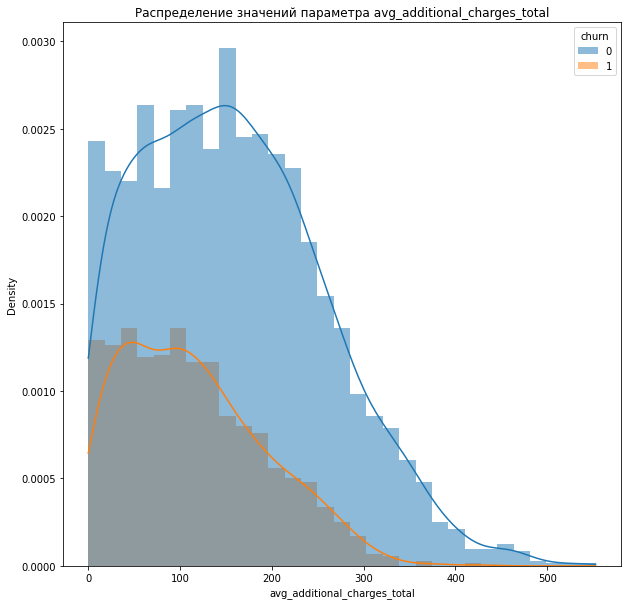

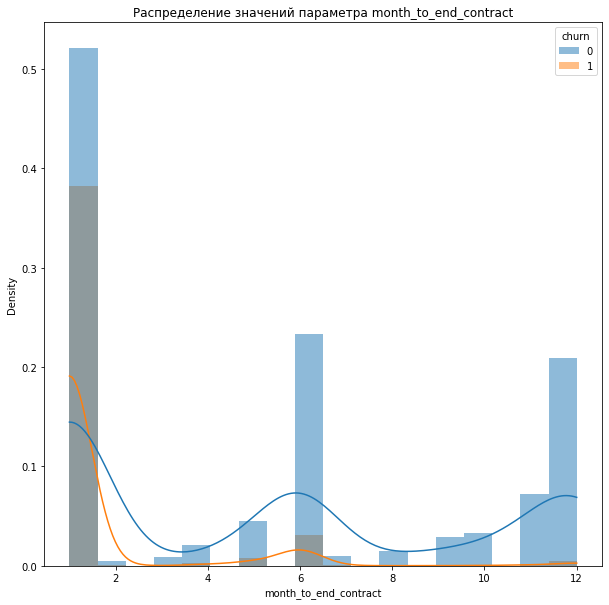

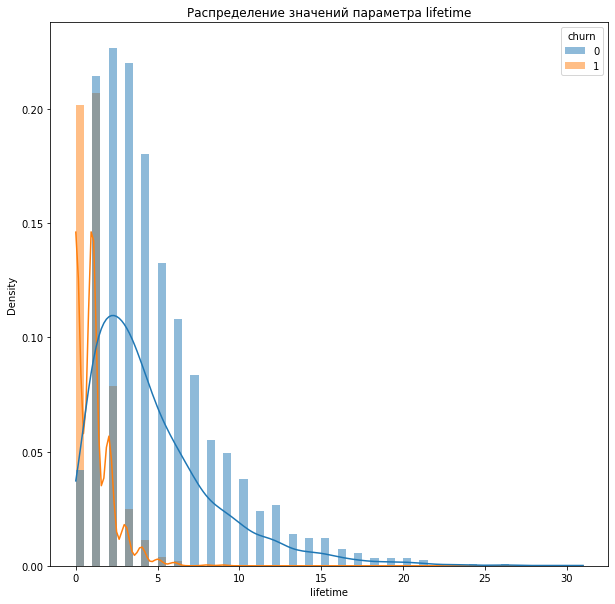

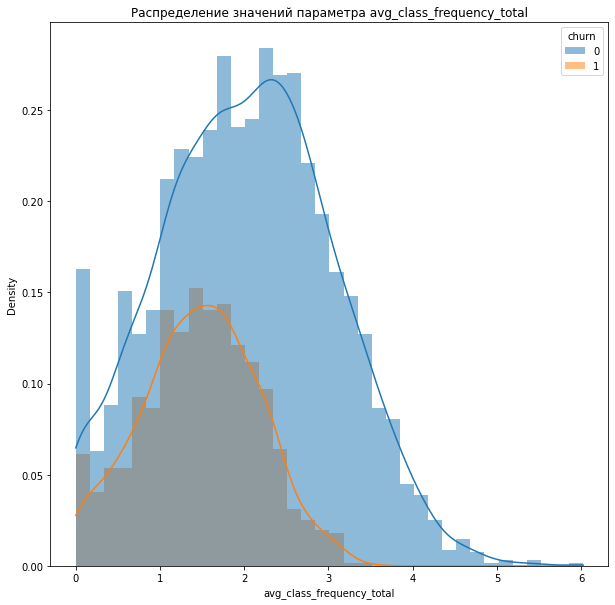

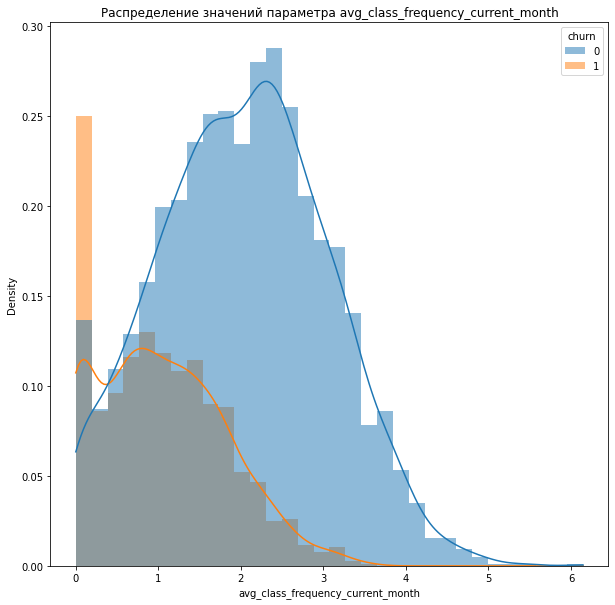

In [9]:
for feature in df.columns:
    if feature != 'churn':
        fig = plt.figure(figsize=(10,10))
        sns.histplot(data=df, x=feature, kde=True, stat='density', linewidth=0, hue='churn')
        if len(df[feature].unique()) <= 2:
            X_ticks_array=[i for i in range(df[feature].min(), df[feature].max()+1, 1)]
            ax1 = plt.xticks(X_ticks_array)
        plt.title('Распределение значений параметра {}'.format(feature))
        plt.show()

Среди ушедших и оставшихся посетителей соотношение мужчин и женщин одинаково - 0.51. Посетители, склонные к уходу, реже приходят по акции "приведи друга" и реже являются сотрудниками компаний-партнеров.  
Соответственно, показатели жизненного цикла и выручки у посетителей, за последний месяц ни разу не посещавших спортзал, ниже, нежели показатели пользователей, не склонных к уходу.  
У посетителей, не склонных к уходу, средний возраст выше - 30 против 27. посетители. Посетители, склонные к уходу, предпочитают покупать абонементы на один месяц. Также посетители, проживающие в другом районе, реже остаются клиентами фитнес-центра на длительный срок.

Определяем корреляцию параметров:

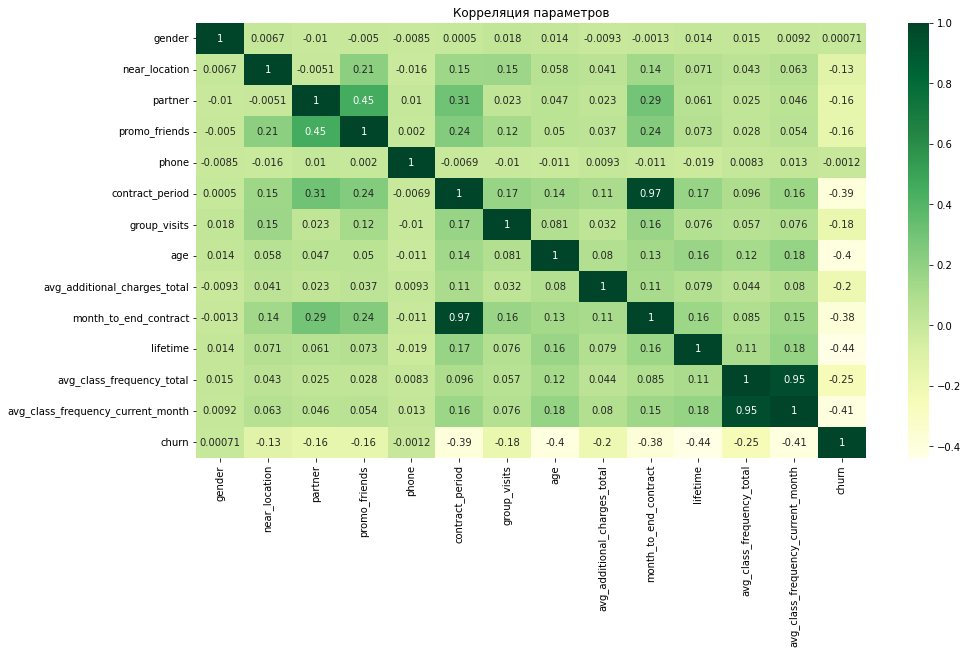

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGn")
plt.title('Корреляция параметров')
plt.show()

Высокая корреляция наблюдается у параметров:
- "contract_period" (длительность абонемента)"/"month_to_end_contract" (срок до окончания текущего действующего абонемента);  
- "avg_class_frequency_total" (средняя частота посещений в неделю за все время с начала действия абонемента)/"avg_class_frequency_current_month" (средняя частота посещений в неделю за предыдущий месяц).  
Во избежание искажений при расчете коэффициентов избавляемся от коррелирующих полей: убираем поля "month_to_end_contract" (срок до окончания текущего действующего абонемента) и "avg_class_frequency_current_month" (средняя частота посещений в неделю за предыдущий месяц).

In [11]:
df = df.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

***Вывод:***  
Среди ушедших и оставшихся посетителей соотношение мужчин и женщин одинаково - 0.51. Посетители, склонные к уходу, реже приходят по акции "приведи друга" и реже являются сотрудниками компаний-партнеров.  
    Соответственно, показатели жизненного цикла и выручки у посетителей, за последний месяц ни разу не посещавших спортзал, ниже, нежели показатели пользователей, не склонных к уходу. У посетителей, не склонных к уходу, средний возраст выше - 30 против 27. посетители. Посетители, склонные к уходу, предпочитают покупать абонементы на один месяц. Также посетители, проживающие в другом районе, реже остаются клиентами фитнес-центра на длительный срок.  
Высокая корреляция наблюдается у параметров:
- "contract_period" (длительность абонемента)/"month_to_end_contract (срок до окончания текущего действующего абонемента);  
- Avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента)/Avg_class_frequency_current_month (средняя частота посещений в неделю за предыдущий месяц).

## Модель прогнозирования оттока клиентов
<a id="forecast"></a>

Разделяем выборку на обучающую и валидационную:

In [12]:
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем данные обучающей и валидационной выборок:

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train) # стандартизируйте обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test) # стандартизируйте тестовую выборку методом transform scaler

Создаем и обучаем модели методами логистической регрессии и случайного леса:

In [14]:
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
]

In [15]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
        )
    )
    print()
    try:
        df_coef = pd.DataFrame(data = {'features' : X.columns, 'coef' : model.coef_[0], 'coef_abs' : abs(model.coef_[0])})
        print('Значения коэффициентов:')
    except:
        df_coef = pd.DataFrame(data = {'features' : X.columns, 'coef_abs' : m.feature_importances_})
        print('Важность признаков:')
    display(df_coef.sort_values(by='coef_abs', ascending=False).reset_index(drop=True))
    print('_______________________________________________________________')

In [16]:
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression(random_state=0)
Accuracy:0.90 Precision:0.79 Recall:0.81 F1:0.80 

Значения коэффициентов:


,features,coef,coef_abs
0,lifetime,-3.879688,3.879688
1,contract_period,-1.316552,1.316552
2,age,-1.093218,1.093218
3,avg_class_frequency_total,-0.730469,0.730469
4,avg_additional_charges_total,-0.567072,0.567072
5,group_visits,-0.359770,0.359770
6,promo_friends,-0.217953,0.217953
7,phone,-0.120001,0.120001
8,near_location,-0.088120,0.088120
9,partner,-0.053055,0.053055


_______________________________________________________________
RandomForestClassifier(random_state=0)
Accuracy:0.89 Precision:0.79 Recall:0.76 F1:0.77 

Важность признаков:


,features,coef_abs
0,lifetime,0.336627
1,avg_class_frequency_total,0.167682
2,age,0.145872
3,avg_additional_charges_total,0.137607
4,contract_period,0.113528
5,group_visits,0.022918
6,promo_friends,0.017572
7,partner,0.017395
8,gender,0.017353
9,near_location,0.013489


_______________________________________________________________


***Вывод:***  

У модели, обученной способом логистической регрессии, следующие параметры имеют наибольшие по модулю коэффициенты:
- "lifetime" (время с момента первого обращения в фитнес-центр);
- "contract_period" - срок действия абонемента;
- "age" - возраст.

У модели, обученной способом случайного леса, наибольшую важность имеют коэффициенты при следующих параметрах:
- "lifetime" (время с момента первого обращения в фитнес-центр);
- avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента);
- "age" - возраст.

По качеству построения модели метод логистической регрессии превосходит метод случайного леса: метрики Accuracy, Recall и F1 имеют более высокие значения.

## Кластеризация клиентов
<a id="clusters"></a>

Стандартизируем данные выборки:

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Строим дендрограмму попарных взаимосвязей параметров:

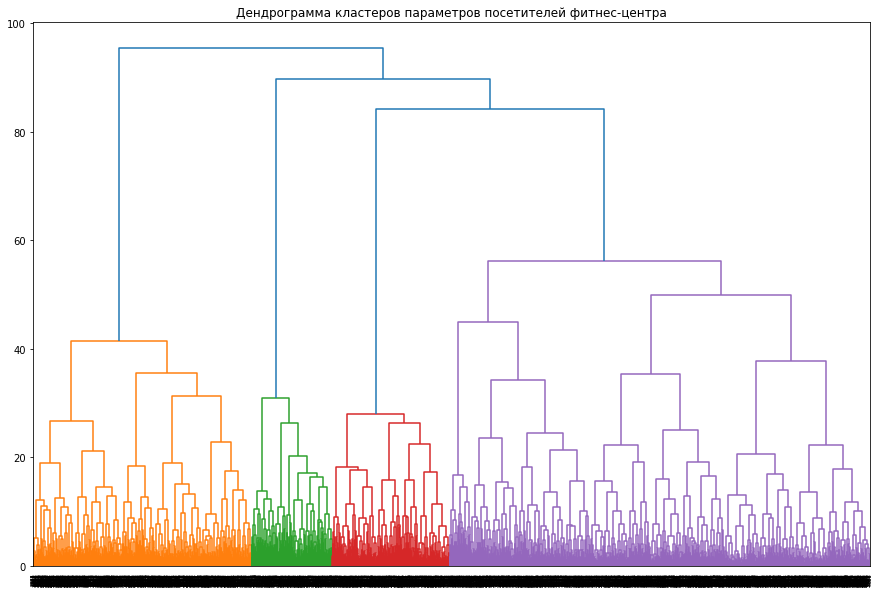

In [18]:
linked = linkage(X_sc, method = 'ward')
ax1 = plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
ax1 = plt.title('Дендрограмма кластеров параметров посетителей фитнес-центра')
plt.show() 

Выводим статистику средних значений признаков для 5 кластеров:

In [19]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_sc)
# сохраняем метки кластера в поле нашего датасета
df_start['churn_group'] = labels
# статистика средних значений признаков по кластеру
df_start.groupby('churn_group').mean().sort_values(by='churn', ascending=False)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
churn_group,,,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,2.853832,3.060606,1.770413,1.606619,0.399287
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,2.650177,3.343640,1.800647,1.645965,0.381625
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,4.165327,3.761194,1.941342,1.845911,0.200918
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,6.988571,4.380952,1.978963,1.933736,0.120952


Доля оттока для каждого кластера - поле "churn".

Строим столбчатые гистограммы и распределения параметров по кластерам:

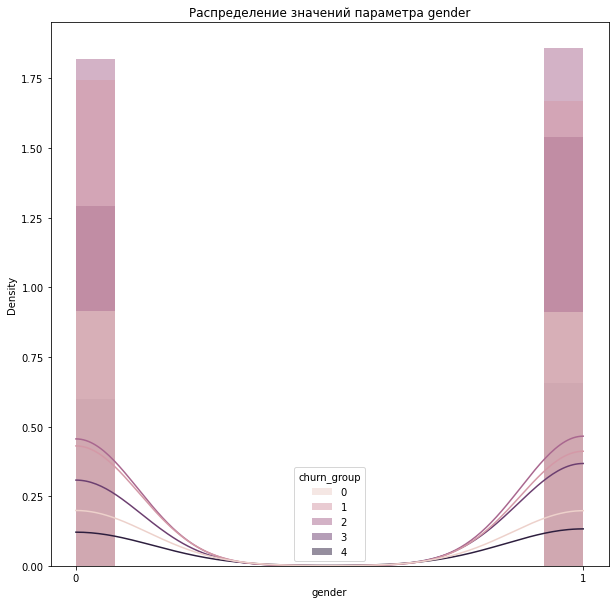

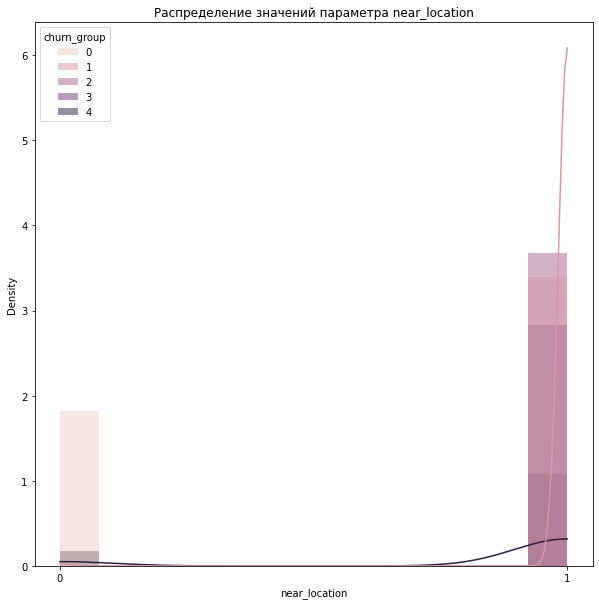

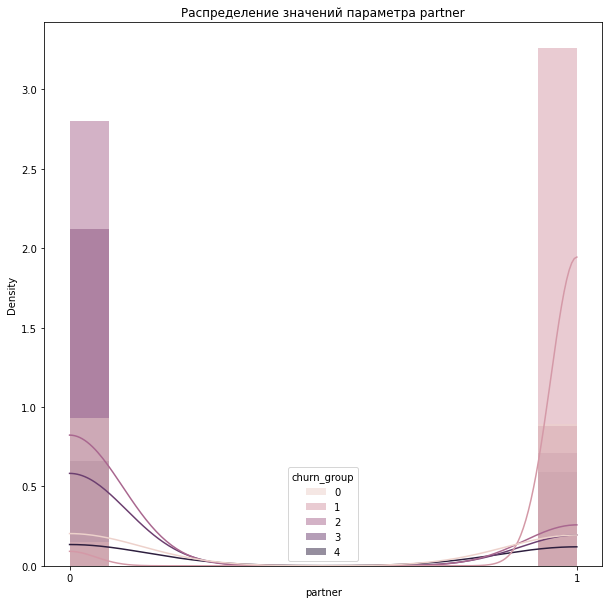

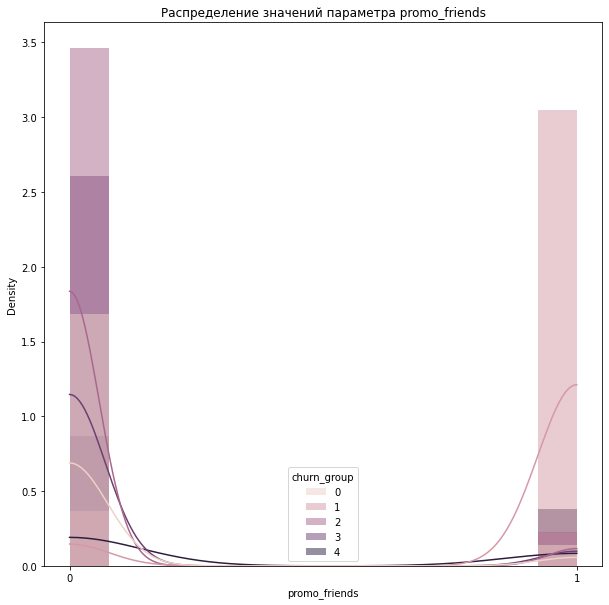

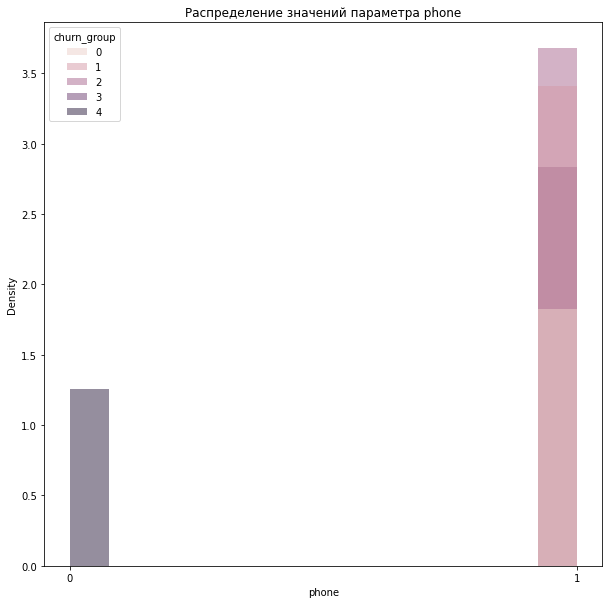

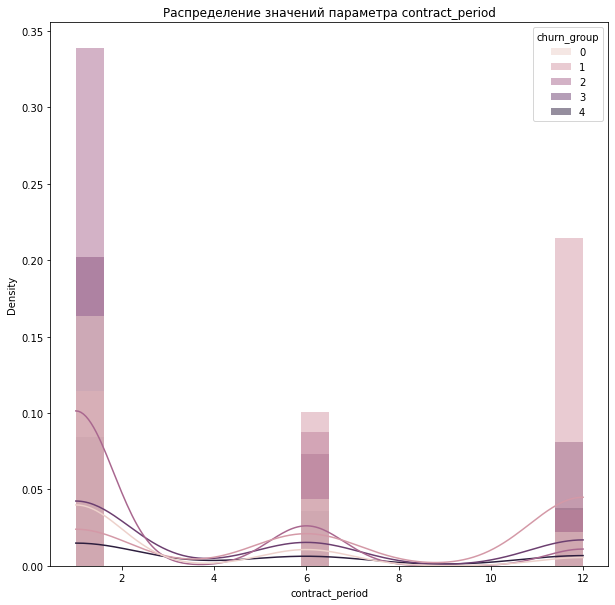

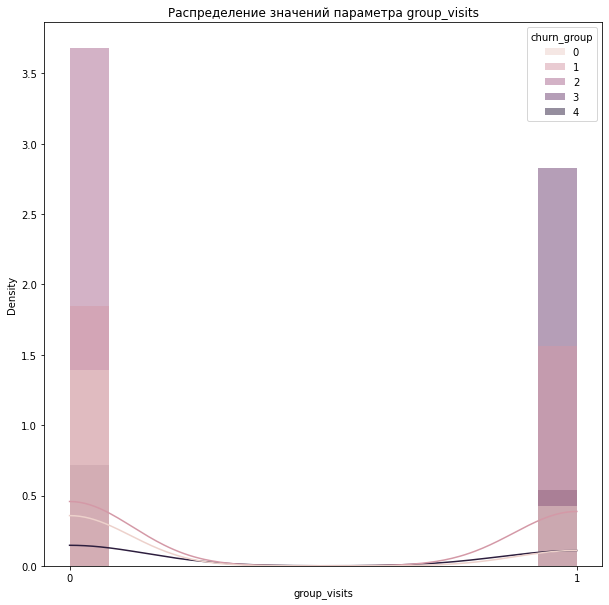

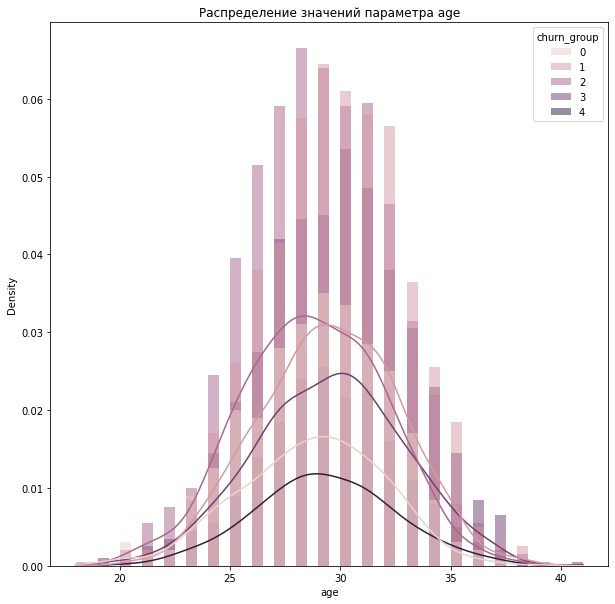

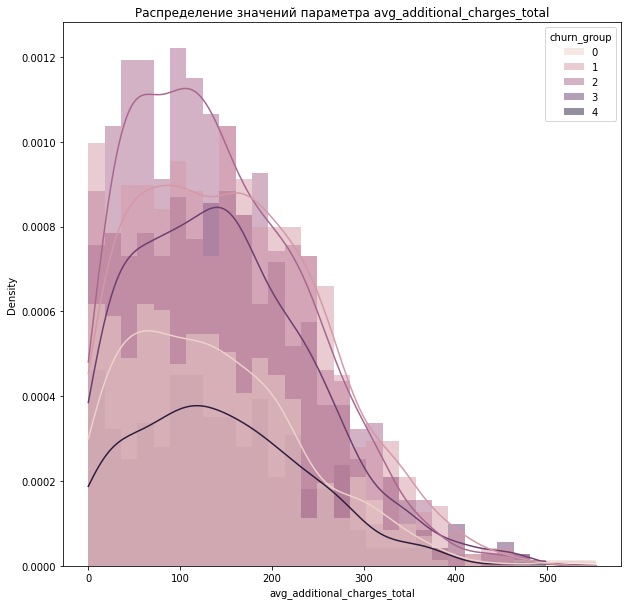

KeyError: 'month_to_end_contract'

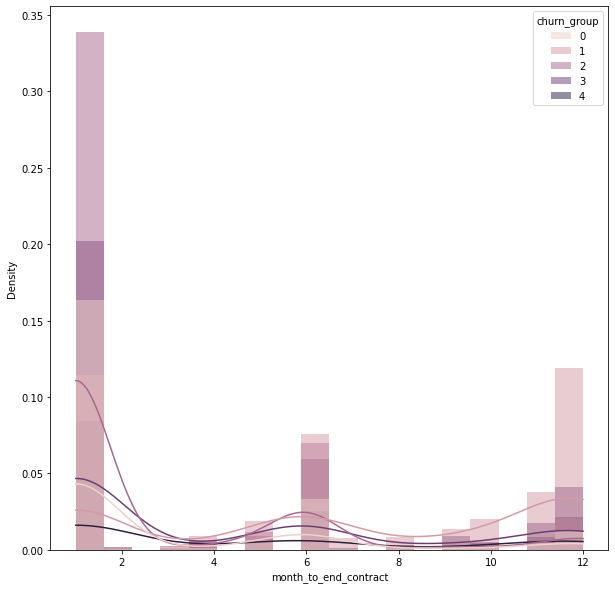

In [20]:
for feature in df_start.columns:
    if feature != 'churn_group':
        fig = plt.figure(figsize=(10,10))
        sns.histplot(data=df_start, x=feature, kde=True, stat='density', linewidth=0, hue='churn_group')
        if len(df[feature].unique()) <= 2:
            X_ticks_array=[i for i in range(df_start[feature].min(), df_start[feature].max()+1, 1)]
            ax1 = plt.xticks(X_ticks_array)
        plt.title('Распределение значений параметра {}'.format(feature))
        plt.show()

***Вывод:***  
1.	Первый по проценту оттока – кластер 0: 40%.  
Для данного кластера характерны:
- все клиенты не проживают в районе фитнес-центра;  
- наименьший средний возраст клиентов;
- наименьший жизненный цикл клиентов.
2.	Второй по проценту оттока – кластер 2: 38%.  
Для данного кластера характерны:
- все клиенты проживают в районе фитнес-центра;
- клиенты не посещают групповые занятия;
- наименьшее количество сотрудников компаний-партнеров среди клиентов; - наименьший срок действия абонемента.
3.	Третий по проценту оттока – кластер 4: 27%.  
Для данного кластера характерны:   
- клиенты не оставляют контактный телефон.  
- наименьшее количество посетителей, пришедших по акции «приведи друга». 
4.	Четвертый по проценту оттока – кластер 3: 20%.  
Для данного кластера характерны:   
- все клиенты посещают групповые занятия;
- все клиенты проживают в районе фитнес-центра;
5.	Пятый по проценту оттока – кластер 1: 12%.  
Для данного кластера характерны:   
- наибольшее количество сотрудников компаний-партнеров среди клиентов;
- наибольшее количество посетителей, пришедших по акции «приведи друга»;
- почти все клиенты проживают в районе фитнес-центра;
- наибольший срок действия абонемента;
- наибольший жизненный цикл клиентов;
- наибольший средний возраст клиентов.



В целом по кластерам наблюдаются следующие тенденции:
-	Чем выше возраст, тем более надежен клиент;
-	Чем больше срок действия абонемента, тем более надежен клиент;
-	Посетители групповых занятий склонны к длительному сотрудничеству;
-	Чем надежней клиент, тем в среднем он больше тратит на дополнительные услуги;
-	Чем надежней клиент, тем чаще он посещает занятия;


## Общий вывод:
<a id="final"></a>

***Общая информация о датафрейме***  
Исходные данные содержат информацию о 4000 тысячах посетителей фитнесс-центра. Каждый клиент описан 14 параметрами.   

***Исследовательский анализ данных (EDA)***
1. В целях экономии ресурсов произведена оптимизация типа данных, вес датафрейма уменьшен на 63% (с 437.6 KB до 164.2 KB).
2. Произведена проверка на выбросы - таковые отсутствуют.
3. Вычислены средние значения параметров как для пользователей, не посещавших фитнес-центр за последний месяц, так и для посещавших.
При сопоставлении результатов выявлены следующие закономерности:  
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем реже живут в районе фитнес-центра;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем реже являются сотрудниками компаний-партнеров;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем реже приходят по акции "приведи друга";
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем оформляют абонемент на меньший период - в среднем 1.7 месяца против 5.7 у клиентов, посещавших спортзал за последний месяц;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем реже посещают групповые занятия;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем на три года моложе клиентов, посещавших спортзал за последний месяц;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем меньше тратят на дополнительные услуги;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем посещают спортзал не дольше месяца, что в 4.7 раза меньше, нежели длительность посещения надежными клиентами;
- клиенты, за последний месяц ни разу не посещавший спортзал, в среднем реже посещают фитнес-центр.  
4. Выявлена высокая степень корреляции следующих параметров:  
- "contract_period" (длительность абонемента)"/"month_to_end_contract" (срок до окончания текущего действующего абонемента);  
- "avg_class_frequency_total" (средняя частота посещений в неделю за все время с начала действия абонемента)/"avg_class_frequency_current_month" (средняя частота посещений в неделю за предыдущий месяц).  
Во избежание искажений при расчете коэффициентов исключены из исследования поля "month_to_end_contract" (срок до окончания текущего действующего абонемента) и "avg_class_frequency_current_month" (средняя частота посещений в неделю за предыдущий месяц).

***Модель прогнозирования оттока клиентов***  
1. Созданы и обучены модели методами логистической регрессии и случайного леса.
У модели, обученной способом логистической регрессии, следующие параметры имеют наибольшие по модулю коэффициенты:  
- "lifetime" (время с момента первого обращения в фитнес-центр);  
- "contract_period" - срок действия абонемента;  
- "age" - возраст.  

У модели, обученной способом случайного леса, наибольшую важность имеют коэффициенты при следующих параметрах:  
- "lifetime" (время с момента первого обращения в фитнес-центр);  
- avg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента);  
- "age" - возраст.  
По качеству построения модели метод логистической регрессии превосходит метод случайного леса: метрики Accuracy, Recall и F1 имеют более высокие значения.  

***Кластеризация клиентов***
1. Построена дендограмма попарных взаимосвязей параметров, на ее основе определено количество кластеров для исследования - 5.  
При помощи алгоритма K-Means выборка разделена на кластеры.  
2. Анализ кластеров показал:  
- чем выше возраст, тем более надежен клиент;
- чем больше срок действия абонемента, тем более надежен клиент;
- посетители групповых занятий склонны к длительному сотрудничеству;
- чем надежней клиент, тем в среднем он больше тратит на дополнительные услуги;
- чем надежней клиент, тем чаще он посещает занятия;
- среди клиентов, посещающих групповые занятия, велика доля надежных.
3. Наибольшая доля оттока - среди клиентов, не проживающих в районе-фитнес центра, а также клиентов, не посещающих групповые занятия.
4. Наименьшая доля оттока - среди клиентов, являющихся сотрудниками компаний партнеров, при этом пришедших по акции "приведи друга".

***Рекомендации:***  
1. По возможности расширить круг компаний-партнеров и распространить на них акцию "приведи друга": их сотрудники - самые надежные посетители.
2. Стимулировать посещение клиентами групповых занятий.
3. Уменьшить рекламу в других районах, если таковая имеется. За счет высвободившихся средств увеличить рекламу в районе фитнес-центра.
4. За счет акций и рекламы стимулировать приток тех, кому более 30 лет.